In [1]:
import tifffile
import numpy as np
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

## Creating the Training Image Database

We create the training image database by extracting sub-volumes from a the original large images at a specific overlap.

### Loading the training image

(400, 400)


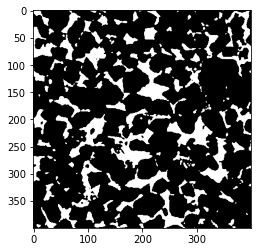

In [2]:
img=tifffile.imread('berea.tif')
plt.imshow(img[1,:,:],cmap='Greys')
print(img[1,:,:].shape)


In [3]:
#You have to have unzipped the tif image first.
img = tifffile.imread("berea.tif")
print(img.shape)

(400, 400, 400)


(64, 64)


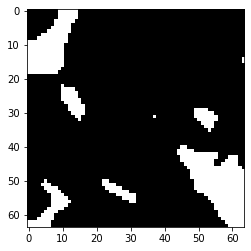

In [4]:
#Let's plot the typical image size so we can get an idea how big the images will be.
plt.imshow(img[50, 0:64, 0:64], cmap="Greys")
print(img[50, 0:64, 0:64].shape)

(128, 128, 128)


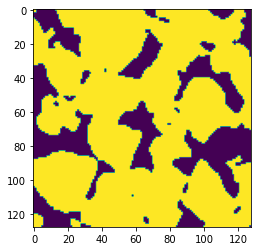

In [5]:
ii=img[0:128,0:128,0:128]
print(ii.shape)
plt.imshow(ii[3,:,:])

In [6]:
count = 0

edge_length = 64 #image dimensions
stride = 20 #stride at which images are extracted

N = edge_length
M = edge_length
O = edge_length

I_inc = stride
J_inc = stride
K_inc = stride

#Have to have this directory to create dataset
target_direc = "training images/berea"
for i in range(0, img.shape[0], I_inc):
    for j in range(0, img.shape[1], J_inc):
        for k in range(0, img.shape[2], K_inc):
            subset = img[i, j:j+N, k:k+O]
            if subset.shape ==  (M, O):
                f = h5py.File(target_direc+str(count)+".hdf5", "w")
                f.create_dataset('data', data=subset, dtype="i8", compression="gzip")
                f.close()
                count += 1
print(count)

5780


In [ ]:
cd training images

In [ ]:
ls

In [ ]:
with h5py.File('berea104.hdf5') as img:
    print((img['data'].shape))
    plt.imshow(img['data'])

In [ ]:
pwd

In [ ]:
pwd

In [ ]:
cd ..